<h1><center>Python For Machine Learning: A Beginner's Workshop</center></h1>
<h2><center>Chapter 6</center></h2>
<h2><center>Going Deep : Tensorflow </center></h2>
<h2><center>UE19EC353:  Machine Learning</center></h2>
<h2><center>Jan - May 2022</center></h2>

##### This Jupyter notebook is a part of the workshop held for introducing Python for Machine Learning. It is a part of the course UE19EC353:  Machine Learning for the Jan-May 2022 session for students of the 6th sem of the ECE Dept of PES University (RR and EC Campus)

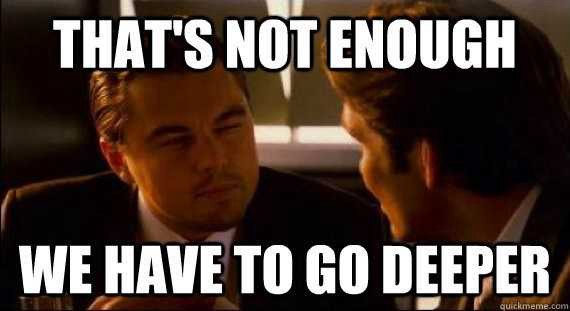

## What is Deep Learning?

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.

Deep Learning is called Deep because of the number of additional “Layers” we add to learn from the data.

## What is Tensorflow?

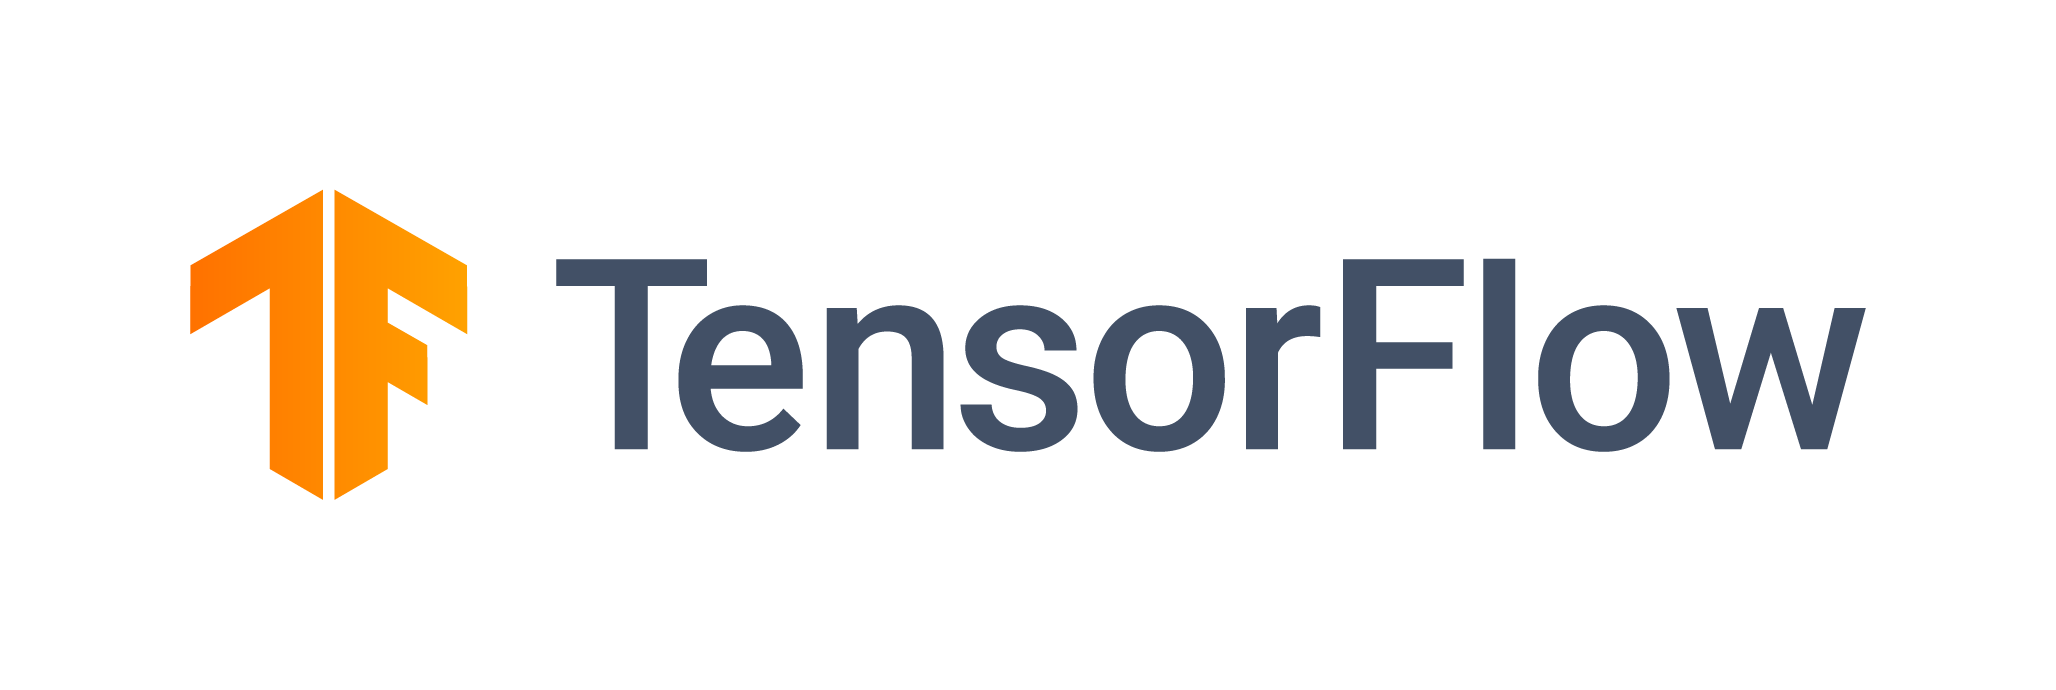

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

## Installation

$ pip install --user --upgrade tensorflow

For installing with GPU, CUDA will be required to be installed

$ pip install tensorflow-gpu==1.15 

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.3.0'

In [7]:
len(tf.config.list_physical_devices('GPU'))

1

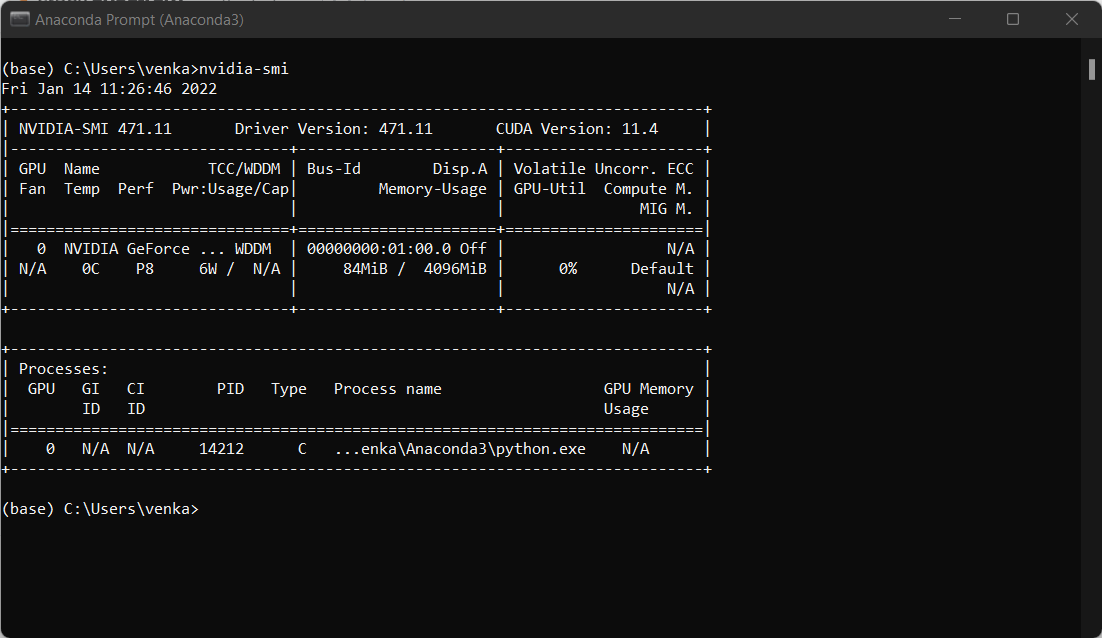

## 6.1 Introduction

### 6.1.1 Hello World

In [9]:
# Create a Tensor.
hello = tf.constant("hello world")
print(hello)

tf.Tensor(b'hello world', shape=(), dtype=string)


In [10]:
# To access a Tensor value, call numpy().
print(hello.numpy())

b'hello world'


### 6.1.2 Tensor Operations

In [11]:
# Defining tensor constants
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [12]:
add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

In [13]:
print("add =", add.numpy())
print("sub =", sub.numpy())
print("mul =", mul.numpy())
print("div =", div.numpy())

add = 5
sub = -1
mul = 6
div = 0.6666666666666666


In [15]:
# Mean and sum
mean = tf.reduce_mean([a, b, c])
sum = tf.reduce_sum([a, b, c])

In [16]:
print("mean =", mean.numpy())
print("sum =", sum.numpy())

mean = 3
sum = 10


In [17]:
# Matrix Multiplication
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

product = tf.matmul(matrix1, matrix2)
print(product.numpy())

[[19. 22.]
 [43. 50.]]


## 6.2 Basic ML Modelling : Linear Regression

In [19]:
import numpy as np
rng = np.random

In [20]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [21]:
# Randomly initializing weights and biases
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


In [22]:
# Defining Linear Regression (Wx + b)
def linear_regression(x):
    return W * x + b

In [23]:
# Define the error function : MSE
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))


In [25]:
# SGD Optimizer
optimizer = tf.optimizers.SGD(learning_rate =0.01)

In [26]:
# Building the optimization process
def run_optimization():
    
    # GradientTape() : a mathematical tool for automatic differentiation (autodiff)
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [27]:
# Running the training
display_step = 100
training_steps = 1000
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 100, loss: 0.384597, W: 0.444204, b: -0.566425
step: 200, loss: 0.295764, W: 0.402652, b: -0.271841
step: 300, loss: 0.241131, W: 0.370066, b: -0.040822
step: 400, loss: 0.207532, W: 0.344511, b: 0.140349
step: 500, loss: 0.186867, W: 0.324471, b: 0.282427
step: 600, loss: 0.174159, W: 0.308755, b: 0.393848
step: 700, loss: 0.166343, W: 0.296430, b: 0.481228
step: 800, loss: 0.161536, W: 0.286764, b: 0.549753
step: 900, loss: 0.158580, W: 0.279184, b: 0.603491
step: 1000, loss: 0.156762, W: 0.273240, b: 0.645634


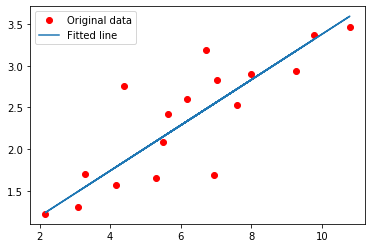

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

## 6.3 Neural Network Design : MNIST 

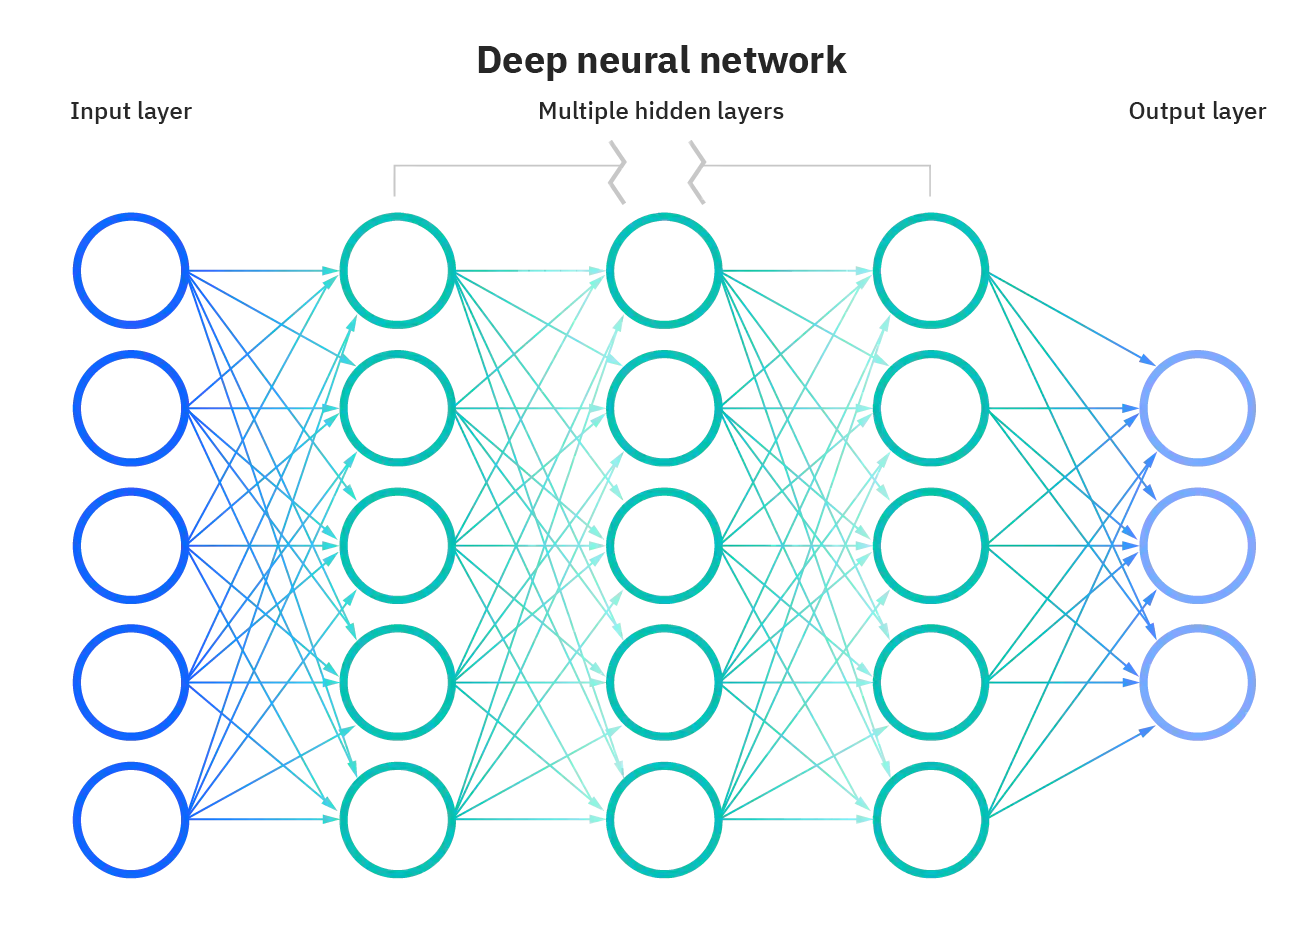

In [29]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

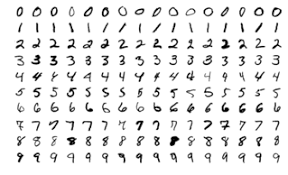

In [30]:
from tensorflow.keras.datasets import mnist

In [35]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [36]:
# Training parameters.
learning_rate = 0.001
training_steps = 3000
batch_size = 256
display_step = 100

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [37]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [38]:

# A random value generator to initialize weights.
random_normal = tf.initializers.RandomNormal()

weights = {
    'h1': tf.Variable(random_normal([num_features, n_hidden_1])),
    'h2': tf.Variable(random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1])),
    'b2': tf.Variable(tf.zeros([n_hidden_2])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [39]:
# Create model.
def neural_net(x):
    # Hidden fully connected layer with 128 neurons.
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Apply sigmoid to layer_1 output for non-linearity.
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden fully connected layer with 256 neurons.
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Apply sigmoid to layer_2 output for non-linearity.
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Output fully connected layer with a neuron for each class.
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(out_layer)

In [40]:
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [41]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(weights.values()) + list(biases.values())

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [42]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 561.120544, accuracy: 0.253906
step: 200, loss: 428.167664, accuracy: 0.492188
step: 300, loss: 229.823090, accuracy: 0.714844
step: 400, loss: 185.337051, accuracy: 0.796875
step: 500, loss: 118.303940, accuracy: 0.875000
step: 600, loss: 123.406410, accuracy: 0.859375
step: 700, loss: 101.825867, accuracy: 0.878906
step: 800, loss: 116.193848, accuracy: 0.882812
step: 900, loss: 124.346802, accuracy: 0.851562
step: 1000, loss: 85.930191, accuracy: 0.917969
step: 1100, loss: 77.085487, accuracy: 0.906250
step: 1200, loss: 65.087616, accuracy: 0.921875
step: 1300, loss: 82.249413, accuracy: 0.925781
step: 1400, loss: 77.103851, accuracy: 0.906250
step: 1500, loss: 56.188423, accuracy: 0.937500
step: 1600, loss: 55.957150, accuracy: 0.929688
step: 1700, loss: 59.347713, accuracy: 0.945312
step: 1800, loss: 78.272545, accuracy: 0.906250
step: 1900, loss: 37.032555, accuracy: 0.949219
step: 2000, loss: 71.892654, accuracy: 0.910156
step: 2100, loss: 58.768272, accuracy: 0

In [43]:
# Test accuracy
pred = neural_net(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.938200


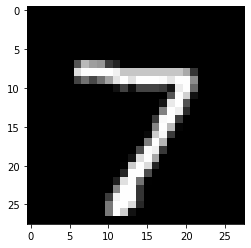

Model prediction: 7


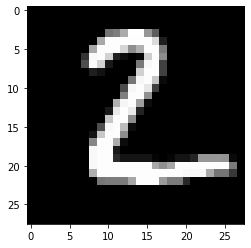

Model prediction: 2


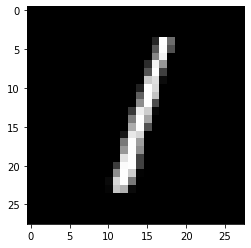

Model prediction: 1


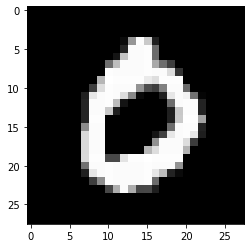

Model prediction: 0


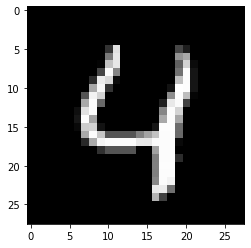

Model prediction: 4


In [44]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = neural_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

##### Pls mail to venkatramnank@pesu.pes.edu for doubts and if you encounter any problems regarding this notebook!!